## Pré-processamento

base: https://archive-beta.ics.uci.edu/dataset/174/parkinsons

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix
from sklearn.model_selection import cross_val_score

rs = 2              # Random State
folds = 10          # Quantity of folds
test_split = 0.25   # Validation

In [2]:
park_data = pd.read_csv('../bases/parkinsons.data', header=None)

park_data

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
1,phon_R01_S01_1,119.99200,157.30200,74.99700,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.03300,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
2,phon_R01_S01_2,122.40000,148.65000,113.81900,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.08500,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
3,phon_R01_S01_3,116.68200,131.11100,111.55500,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.65100,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
4,phon_R01_S01_4,116.67600,137.87100,111.36600,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.64400,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,phon_R01_S50_2,174.18800,230.97800,94.26100,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.51700,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
192,phon_R01_S50_3,209.51600,253.01700,89.48800,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.14700,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
193,phon_R01_S50_4,174.68800,240.00500,74.28700,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.88300,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
194,phon_R01_S50_5,198.76400,396.96100,74.90400,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.02000,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [3]:
feature_names = park_data.iloc[0]
feature_names.pop(0)

df = park_data.drop(park_data.index[0])
df = df.drop(0, axis=1)
df = df.astype(float)

df

,1,2,3,4,5,6,7,8,9,10,...,14,15,16,17,18,19,20,21,22,23
1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1.0,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1.0,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1.0,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1.0,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1.0,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,...,0.07008,0.02764,19.517,0.0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
192,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,...,0.04812,0.01810,19.147,0.0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
193,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,...,0.03804,0.10715,17.883,0.0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
194,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,...,0.03794,0.07223,19.020,0.0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [4]:
feature_names

1          MDVP:Fo(Hz)
2         MDVP:Fhi(Hz)
3         MDVP:Flo(Hz)
4       MDVP:Jitter(%)
5     MDVP:Jitter(Abs)
6             MDVP:RAP
7             MDVP:PPQ
8           Jitter:DDP
9         MDVP:Shimmer
10    MDVP:Shimmer(dB)
11        Shimmer:APQ3
12        Shimmer:APQ5
13            MDVP:APQ
14         Shimmer:DDA
15                 NHR
16                 HNR
17              status
18                RPDE
19                 DFA
20             spread1
21             spread2
22                  D2
23                 PPE
Name: 0, dtype: object

In [5]:
df[17].value_counts()

1.0    147
0.0     48
Name: 17, dtype: int64

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold

features = list(df.columns.values)
features.remove(17)

X = df.drop(columns=17, axis=1).values
y = df[17].values

std = StandardScaler()
X = std.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= test_split, random_state=rs)

# Oversampling unbanlanced data
sm = SMOTE(random_state=rs) 
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

kfold = StratifiedKFold(n_splits= folds, random_state= rs, shuffle=True)


In [7]:
np.unique(y_train_over, return_counts=True)

(array([0., 1.]), array([107, 107]))

In [8]:
def cross_val(model, X_train, y_train) -> np.array:
    
    model_results = []

    for train_index, test_index in kfold.split(X_train, y_train):
        
        X_fold_train, y_fold_train = X_train[train_index], y_train[train_index]
        X_fold_test, y_fold_test = X_train[test_index], y_train[test_index]
        
        model.fit(X_fold_train, y_fold_train)
        y_pred = model.predict(X_fold_test)
        model_results.append(accuracy_score(y_fold_test, y_pred))

    return np.array(model_results)

In [9]:
import shap

def feature_selection(model, feature_names, X_train, X_test, num_samples = 50) -> list:
    
    shap.initjs()

    explainer = shap.KernelExplainer(model.predict_proba, X_train)
    shap_values = explainer.shap_values(shap.sample(X_test, num_samples, random_state=rs))
    shap.summary_plot(shap_values, X_test, plot_type="bar")
    
    shap_sum = 0

    for value in shap_values:
        shap_sum += np.abs(value) 

    shap_sum = shap_sum.mean(axis=0)

    importance_df = pd.DataFrame([feature_names, shap_sum.tolist()]).T
    importance_df.columns = ['feature', 'importance']
    importance_df = importance_df.sort_values('importance', ascending=False)
    
    mean = importance_df['importance'].mean()
    std = importance_df['importance'].std()
    values = importance_df['importance']

    z_scores = [(val - mean) / std for val in values]
    
    n = len([x for x in z_scores if x > 0])
    features = list(importance_df['importance'].head(n).index.astype(int))
    
    return features

## Teste com SVM

In [10]:
#Tunning

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.1, 1],
    'degree': [2, 3, 4],
    'coef0': [0.0, 0.5, 1.0],
    'shrinking': [True, False],
    'probability': [True]
}

grid_search = GridSearchCV(SVC(), param_grid, cv= folds, n_jobs=4)
grid_search.fit(X_train_over, y_train_over)

GridSearchCV(cv=10, estimator=SVC(), n_jobs=4,
             param_grid={'C': [0.1, 1, 10, 100], 'coef0': [0.0, 0.5, 1.0],
                         'degree': [2, 3, 4],
                         'gamma': ['scale', 'auto', 0.1, 1],
                         'kernel': ['linear', 'rbf', 'poly'],
                         'probability': [True], 'shrinking': [True, False]})

In [11]:
print(grid_search.best_params_)
model = grid_search.best_estimator_

{'C': 100, 'coef0': 0.5, 'degree': 4, 'gamma': 'scale', 'kernel': 'poly', 'probability': True, 'shrinking': True}


In [12]:
#Treino

svm_results = cross_val(model, X_train_over, y_train_over)

print("SVM Treino:", svm_results.mean())
df_teste = pd.DataFrame(svm_results)
df_teste

SVM Treino: 0.9768398268398268


,0
0,1.000000
1,0.909091
2,1.000000
3,0.954545
4,0.952381
5,1.000000
6,1.000000
7,0.952381
8,1.000000
9,1.000000


In [13]:
from sklearn.base import clone

test = clone(model)

SVM Teste:  0.9183673469387755


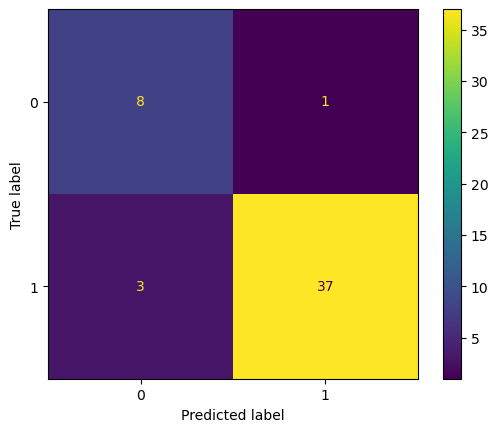

In [14]:
#Teste

#test.fit(X_train_over, y_train_over)
y_pred = model.predict(X_test)
svm_acc = accuracy_score(y_test, y_pred)

print("SVM Teste: ", svm_acc)
cm = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
cm.plot()

### Feature Selection

[WARNING] [2023-05-16 19:37:21,372:shap] Using 146 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/49 [00:00<?, ?it/s]

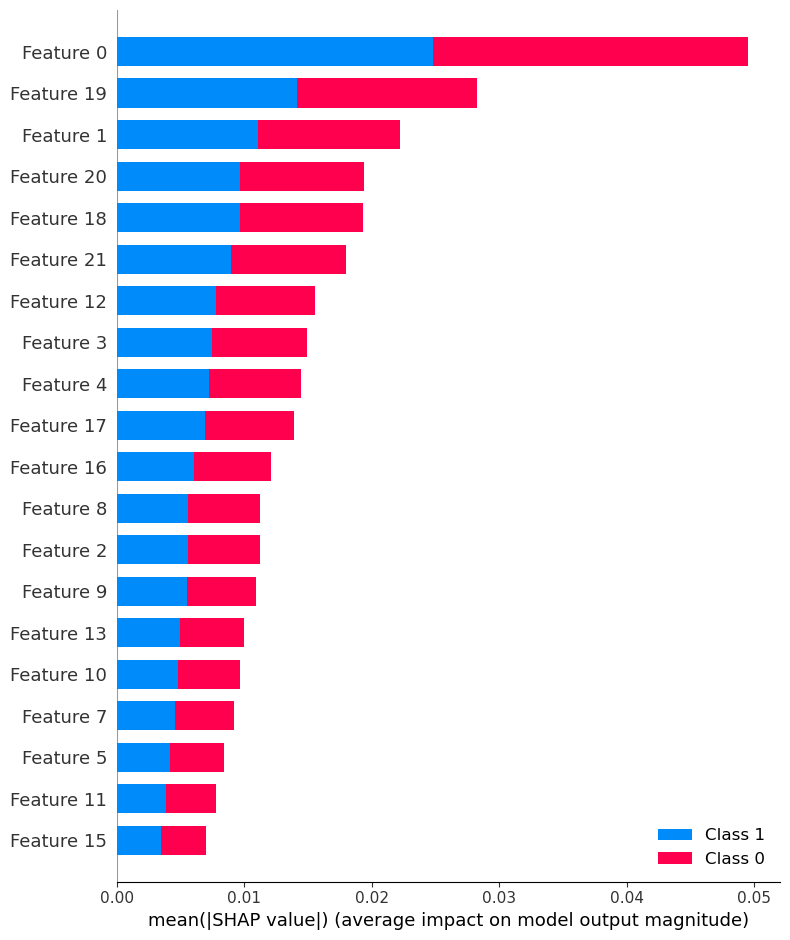

Best Features:  [0, 19, 1, 20, 18, 21, 12, 3]
(146, 8)


In [139]:
svm_features = feature_selection(model, features, X_train, X_test)

X_train_shap = X_train[:, svm_features]
X_test_shap = X_test[:, svm_features]

print("Best Features: ", svm_features)
print(X_train_shap.shape)

In [140]:
# Treino (SHAP)

svm_results_shap = cross_val(model, X_train_shap, y_train)

print("SVM Treino (SHAP): ", svm_results_shap.mean())
pd.DataFrame(svm_results_shap)

SVM Treino (SHAP):  0.8685714285714285


,0
0,1.000000
1,0.800000
2,0.733333
3,1.000000
4,1.000000
5,0.866667
6,0.928571
7,0.642857
8,0.857143
9,0.857143


Teste (SHAP):  0.8571428571428571


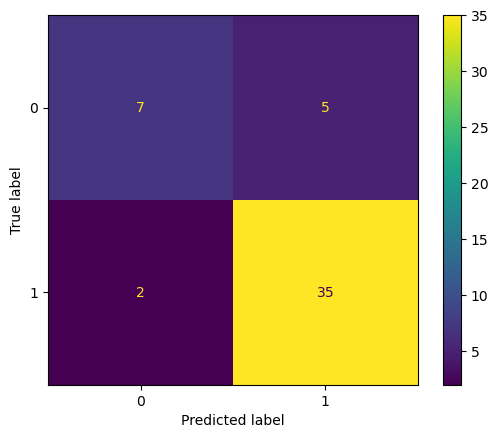

In [141]:
# Teste (SHAP)

model.fit(X_train_shap, y_train)
y_pred = model.predict(X_test_shap)
svm_acc_shap = accuracy_score(y_test, y_pred)

print("Teste (SHAP): ", svm_acc_shap)
cm = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
cm.plot()

## Teste com AutoSklearn

In [ ]:
from autosklearn.classification import AutoSklearnClassifier

minutos = 5

automl = AutoSklearnClassifier(
    include = {
        "classifier": ["random_forest", "extra_trees", "decision_tree", 
                       'liblinear_svc', 'libsvm_svc','k_nearest_neighbors']
    },
    time_left_for_this_task= minutos*60,
    per_run_time_limit= 30,
    ensemble_class= 'none',
    #ensemble_nbest = 25,
    n_jobs = 4
)

automl.fit(X_train_over, y_train_over, dataset_name= 'Parkinson Disease Prediction')

Ensemble final

In [143]:
import pprint
pp = pprint.PrettyPrinter(indent = 4)

pp.pprint(automl.show_models())

{   112: {   'balancing': Balancing(random_state=1, strategy='weighting'),
             'classifier': <autosklearn.pipeline.components.classification.ClassifierChoice object at 0x7f8370697310>,
             'cost': 0.04109589041095896,
             'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice object at 0x7f8388d001c0>,
             'ensemble_weight': 1.0,
             'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice object at 0x7f8370695db0>,
             'model_id': 112,
             'rank': 1,
             'sklearn_classifier': ExtraTreesClassifier(criterion='entropy', max_features=4, n_estimators=512,
                     n_jobs=1, random_state=1, warm_start=True)}}


In [167]:
from sklearn.base import clone

models = automl.show_models()
best_model = list(models.keys())[0]

autosklearn_classifier = clone(models[best_model]["sklearn_classifier"])

print(autosklearn_classifier)
print('\n', automl.sprint_statistics())

ExtraTreesClassifier(criterion='entropy', max_features=4, n_estimators=512,
                     n_jobs=1, random_state=1, warm_start=True)

 auto-sklearn results:
  Dataset name: Parkinson Disease Prediction
  Metric: accuracy
  Best validation score: 0.958904
  Number of target algorithm runs: 157
  Number of successful target algorithm runs: 139
  Number of crashed target algorithm runs: 18
  Number of target algorithms that exceeded the time limit: 0
  Number of target algorithms that exceeded the memory limit: 0



In [168]:
#Treino

autosk_results = cross_val(autosklearn_classifier, X_train, y_train)

print("AutoSklearn (treino):", autosk_results.mean())
df_teste = pd.DataFrame(autosk_results)
df_teste

Warm-start fitting without increasing n_estimators does not fit new trees.
Warm-start fitting without increasing n_estimators does not fit new trees.
Warm-start fitting without increasing n_estimators does not fit new trees.
Warm-start fitting without increasing n_estimators does not fit new trees.
Warm-start fitting without increasing n_estimators does not fit new trees.
Warm-start fitting without increasing n_estimators does not fit new trees.


AutoSklearn (treino): 1.0


Warm-start fitting without increasing n_estimators does not fit new trees.
Warm-start fitting without increasing n_estimators does not fit new trees.
Warm-start fitting without increasing n_estimators does not fit new trees.


,0
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
5,1.0
6,1.0
7,1.0
8,1.0
9,1.0


Teste:  0.9387755102040817


Warm-start fitting without increasing n_estimators does not fit new trees.


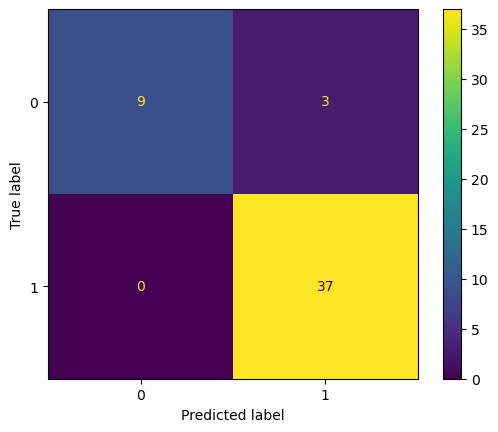

In [169]:
#Teste

autosklearn_classifier.fit(X_train, y_train)
y_pred = autosklearn_classifier.predict(X_test)
autosk_acc = accuracy_score(y_test, y_pred)

print("Teste: ", autosk_acc)
cm = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
cm.plot()

### Feature Selection

[WARNING] [2023-05-16 19:56:54,474:shap] Using 146 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/49 [00:00<?, ?it/s]

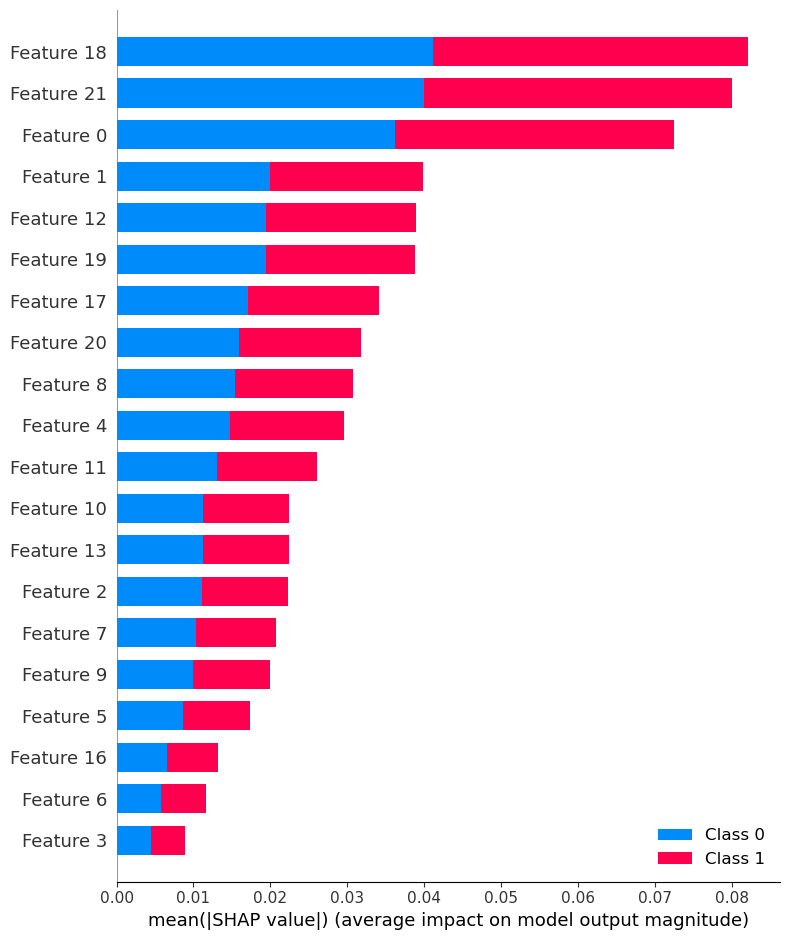

Best Features:  [18, 21, 0, 1, 12, 19, 17, 20]
(146, 8)


In [170]:
autosk_features = feature_selection(autosklearn_classifier, features, X_train, X_test)

X_train_shap = X_train[:, autosk_features]
X_test_shap = X_test[:, autosk_features]

print("Best Features: ", autosk_features)
print(X_train_shap.shape)

In [174]:
# Treino (SHAP)
autosklearn_classifier = clone(models[best_model]["sklearn_classifier"])
autosk_results_shap = cross_val(autosklearn_classifier, X_train_shap, y_train)

print("AutoSklearn Treino (SHAP): ", autosk_results_shap.mean())
pd.DataFrame(autosk_results_shap)

Warm-start fitting without increasing n_estimators does not fit new trees.
Warm-start fitting without increasing n_estimators does not fit new trees.
Warm-start fitting without increasing n_estimators does not fit new trees.
Warm-start fitting without increasing n_estimators does not fit new trees.
Warm-start fitting without increasing n_estimators does not fit new trees.
Warm-start fitting without increasing n_estimators does not fit new trees.


AutoSklearn Treino (SHAP):  1.0


Warm-start fitting without increasing n_estimators does not fit new trees.
Warm-start fitting without increasing n_estimators does not fit new trees.
Warm-start fitting without increasing n_estimators does not fit new trees.


,0
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
5,1.0
6,1.0
7,1.0
8,1.0
9,1.0


Teste (SHAP): 0.9183673469387755


Warm-start fitting without increasing n_estimators does not fit new trees.


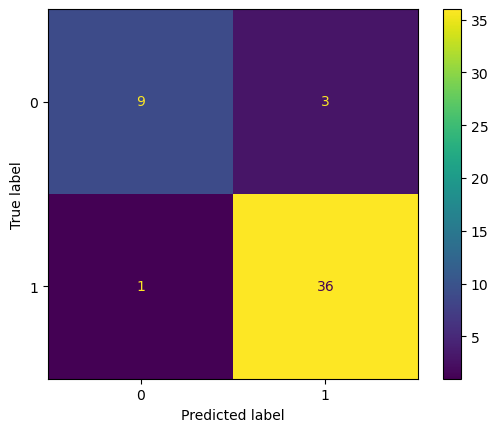

In [176]:
# Teste (SHAP)

autosklearn_classifier.fit(X_train_shap, y_train)
y_pred = autosklearn_classifier.predict(X_test_shap)
autosk_acc_shap = accuracy_score(y_test, y_pred)

print("Teste (SHAP):", autosk_acc_shap)
cm = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
cm.plot()

## Teste com FLAML

In [ ]:
from flaml import AutoML

minutos = 5

fla_automl = AutoML()

fla_automl_settings = {
    "time_budget": minutos*60,
    "metric": 'accuracy',
    "n_jobs": -1,
    "ensemble": False,
    "verbose": 1,
    "n_splits": folds
}

fla_automl.fit(X_train_over, y_train_over, task= "classification", **fla_automl_settings)

In [178]:
from sklearn.base import clone

flaml_classifier = clone(fla_automl.model.estimator)

print(flaml_classifier)

LGBMClassifier(colsample_bytree=0.8730993658568231, learning_rate=1.0,
               max_bin=1023, min_child_samples=8, n_estimators=28,
               num_leaves=29, reg_alpha=0.09175748785020815,
               reg_lambda=0.41641331041721563, verbose=-1)


In [179]:
#Treino

flaml_results = cross_val(flaml_classifier, X_train, y_train)

print("FlaML (treino):", flaml_results.mean())
df_teste = pd.DataFrame(flaml_results)
df_teste

FlaML (treino): 0.9104761904761907


,0
0,1.000000
1,0.800000
2,0.933333
3,0.866667
4,1.000000
5,0.933333
6,1.000000
7,0.785714
8,0.857143
9,0.928571


Teste:  0.9591836734693877


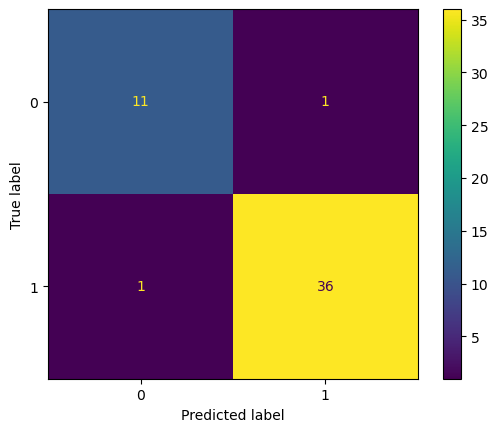

In [180]:
#Teste

flaml_classifier.fit(X_train, y_train)
y_pred = flaml_classifier.predict(X_test)
flaml_acc = accuracy_score(y_test, y_pred)

print("Teste: ", flaml_acc)
cm = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
cm.plot()

### Feature Selection

[WARNING] [2023-05-16 20:15:11,459:shap] Using 146 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/49 [00:00<?, ?it/s]

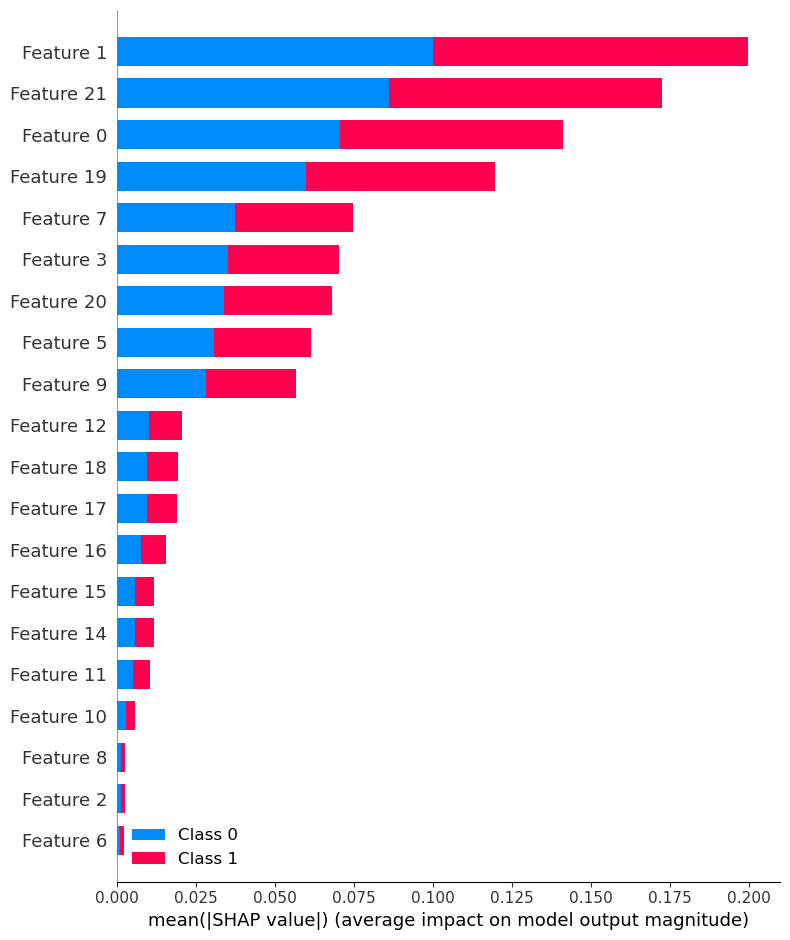

Best Features:  [1, 21, 0, 19, 7, 3, 20, 5, 9]
(146, 9)


In [197]:
flaml_features = feature_selection(flaml_classifier, features, X_train, X_test)

X_train_shap = X_train[:, flaml_features]
X_test_shap = X_test[:, flaml_features]

print("Best Features: ", flaml_features)
print(X_train_shap.shape)

In [198]:
# Teste (SHAP)

flaml_classifier = clone(fla_automl.model.estimator)
flaml_results_shap = cross_val(flaml_classifier, X_train_shap, y_train)

print("Flaml Treino (SHAP): ", flaml_results_shap.mean())
pd.DataFrame(flaml_results_shap)

Flaml Treino (SHAP):  0.9171428571428573


,0
0,1.000000
1,0.800000
2,0.933333
3,0.933333
4,1.000000
5,0.933333
6,1.000000
7,0.857143
8,0.857143
9,0.857143


Teste (SHAP):  0.8979591836734694


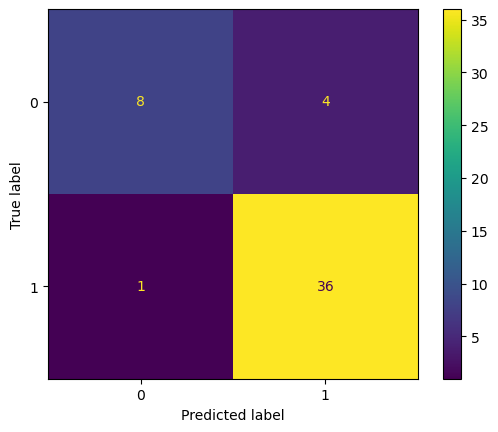

In [199]:
# Validação (SHAP)

flaml_classifier.fit(X_train_shap, y_train)
y_pred = flaml_classifier.predict(X_test_shap)
flaml_acc_shap = accuracy_score(y_test, y_pred)

print("Teste (SHAP): ", flaml_acc_shap)
cm = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
cm.plot()

## Resumo

In [200]:
print(
    "Classificador: ", 'SVM', '\n'
    "Modelo: ", model, '\n'
    "Acurácia: ", round(svm_results.mean(), 4), round(svm_results.std(), 4), '\n'
    "Teste", round(svm_acc, 4), '\n'
    "N. Features: ", len(svm_features), '\n'
    "Features (SHAP): ", svm_features ,'\n'
    "Acurácia (SHAP): ", round(svm_results_shap.mean(), 4), round(svm_results_shap.std(), 4), '\n'
    "Teste (SHAP)", round(svm_acc_shap, 4), '\n\n'
)

print(
    "Classificador: ", 'AutoSklearn', '\n'
    "Modelo: ", autosklearn_classifier, '\n'
    "Acurácia: ", round(autosk_results.mean(), 4), round(autosk_results.std(), 4),'\n'
    "Teste", round(autosk_acc, 4), '\n'
    "N. Features: ", len(autosk_features), '\n'
    "Features (SHAP): ", autosk_features ,'\n'
    "Acurácia (SHAP): ", round(autosk_results_shap.mean(), 4), round(autosk_results_shap.std(), 4), '\n'
    "Teste (SHAP)", round(autosk_acc_shap, 4), '\n\n'
)

print(
    "Classificador: ", 'FlaML', '\n'
    "Modelo: ", flaml_classifier, '\n'
    "Acurácia: ", round(flaml_results.mean(), 4), round(flaml_results.std(), 4),'\n'
    "Teste", round(flaml_acc, 4), '\n'
    "N. Features: ", len(flaml_features), '\n'
    "Features (SHAP): ", flaml_features ,'\n'
    "Acurácia (SHAP): ", round(flaml_results_shap.mean(), 4), round(flaml_results_shap.std(), 4), '\n'
    "Teste (SHAP)", round(flaml_acc_shap, 4), '\n\n'
)

Classificador:  SVM 
Modelo:  SVC(C=0.1, coef0=0.5, degree=4, gamma=1, kernel='poly', probability=True) 
Acurácia:  0.8967 0.0945 
Teste 0.8776 
N. Features:  8 
Features (SHAP):  [0, 19, 1, 20, 18, 21, 12, 3] 
Acurácia (SHAP):  0.8686 0.1139 
Teste (SHAP) 0.8571 


Classificador:  AutoSklearn 
Modelo:  ExtraTreesClassifier(criterion='entropy', max_features=4, n_estimators=512,
                     n_jobs=1, random_state=1, warm_start=True) 
Acurácia:  1.0 0.0 
Teste 0.9388 
N. Features:  8 
Features (SHAP):  [18, 21, 0, 1, 12, 19, 17, 20] 
Acurácia (SHAP):  1.0 0.0 
Teste (SHAP) 0.9184 


Classificador:  FlaML 
Modelo:  LGBMClassifier(colsample_bytree=0.8730993658568231, learning_rate=1.0,
               max_bin=1023, min_child_samples=8, n_estimators=28,
               num_leaves=29, reg_alpha=0.09175748785020815,
               reg_lambda=0.41641331041721563, verbose=-1) 
Acurácia:  0.9105 0.0761 
Teste 0.9592 
N. Features:  9 
Features (SHAP):  [1, 21, 0, 19, 7, 3, 20, 5, 9] 
Acurá